# USING NORMAL EQUATION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("salary_data.csv")

In [3]:
# data = data.sample(frac = 1)

In [4]:
data_train  = data.iloc[0 : 20 , [0 , 1]]
data_test = data.iloc[20 : ]
data_train.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


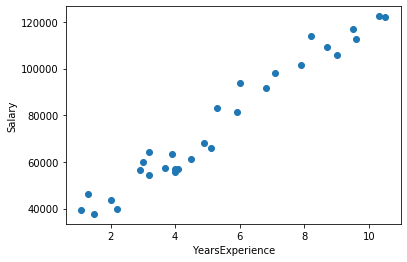

In [5]:
plt.scatter(data["YearsExperience"] , data["Salary"]) 
plt.xlabel("YearsExperience") 
plt.ylabel("Salary")
plt.show()

In [6]:
x = data_train["YearsExperience"]
y = data_train["Salary"]

In [7]:
x_test = data_test["YearsExperience"]
y_test = data_test["Salary"]

In [8]:
y_test

20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64

In [9]:
x = np.array(x)
y = np.array(y)

In [10]:
x

array([1.1, 1.3, 1.5, 2. , 2.2, 2.9, 3. , 3.2, 3.2, 3.7, 3.9, 4. , 4. ,
       4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6. ])

In [11]:
n = len(data_train["YearsExperience"])
n

20

In [12]:
x_bias = np.ones((n , 1))
# x_bias

In [13]:
print(x_bias.shape)

(20, 1)


In [14]:
print(x.shape)

(20,)


In [15]:
x_new = np.reshape(x , (n , 1))

In [16]:
x_new.shape

(20, 1)

In [17]:
x_new = np.append(x_bias , x_new , axis = 1)

In [18]:
x_new

array([[1. , 1.1],
       [1. , 1.3],
       [1. , 1.5],
       [1. , 2. ],
       [1. , 2.2],
       [1. , 2.9],
       [1. , 3. ],
       [1. , 3.2],
       [1. , 3.2],
       [1. , 3.7],
       [1. , 3.9],
       [1. , 4. ],
       [1. , 4. ],
       [1. , 4.1],
       [1. , 4.5],
       [1. , 4.9],
       [1. , 5.1],
       [1. , 5.3],
       [1. , 5.9],
       [1. , 6. ]])

FINDING TRANSPOSE

In [19]:
x_new_transpose = np.transpose(x_new)

MATRIX MULTIPLICATION

In [20]:
x_new_transpose_dot_x_new = x_new_transpose.dot(x_new)

INVERSE OF MATRIX

In [21]:
temp_1 = np.linalg.inv(x_new_transpose_dot_x_new)

MULTIPLICATION OF MATRICES

In [22]:
temp_2 = x_new_transpose.dot(y)

SLOPE AND INTERCEPT

In [23]:
theta = temp_1.dot(temp_2)

In [24]:
theta

array([26577.40001951,  9116.11420069])

In [25]:
intercept = theta[0]
slope = theta[1]

In [26]:
print("Intercept : " , intercept)
print("Slope : " , slope)

Intercept :  26577.400019513094
Slope :  9116.114200692726


PLOTTING THE LINE

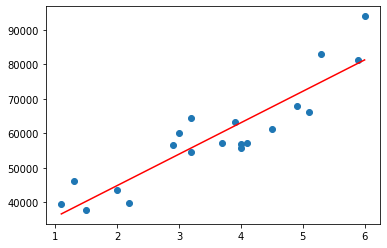

In [27]:
plt.scatter(x , y)
plt.plot(x , intercept + slope *x , color = "red")

FUNCTION TO PREDICT VALUES

In [28]:
def predict(feature , slope , intercept) :
    
    prediction = intercept + (slope * feature)
    
    return prediction

PREDICTION

In [29]:
predicted = predict(x_test , slope , intercept)

In [30]:
print(predicted)

20     88566.976584
21     91301.810844
22     98594.702205
23    101329.536465
24    105887.593566
25    108622.427826
26    113180.484926
27    114092.096346
28    120473.376287
29    122296.599127
Name: YearsExperience, dtype: float64


In [31]:
df = pd.DataFrame(data_test["Salary"])
df["Predicted"] = pd.DataFrame(predicted)

In [32]:
df

,Salary,Predicted
20,91738,88566.976584
21,98273,91301.810844
22,101302,98594.702205
23,113812,101329.536465
24,109431,105887.593566
25,105582,108622.427826
26,116969,113180.484926
27,112635,114092.096346
28,122391,120473.376287
29,121872,122296.599127
